# Iris con árboles de decisión

Veamos que es muy fácil aprender, representar y evaluar un árbol de decisión con sklearn.

Empezamos importando librerías y funciones que necesitaremos:

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

Lectura del corpus iris:

In [2]:
iris = load_iris()
X = iris.data 
y = iris.target

Creamos un split de iris con un $40\%$ de datos para test y el resto para train, barajando previamente los datos de acuerdo con una semilla dada para generación de números aleatorios. Aquí, como en todo código que incluya aleatoriedad (que requiera generar números aleatorios), conviene fijar dicha semilla para poder reproducir experimentos con exactitud. 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, shuffle=True, random_state=23)

"""
train_test_split(...) coge la muestra y lo separa en conjunto de test y conjunto de entrenamiento
- X_ : features
- y_ : etiquetas
- test_size: tamaño del conjunto de test (0.4 == 40%)
- suffle: mezcla los datos (depende de una semilla)
- random_state: semilla
"""

'\ntrain_test_split(...) coge la muestra y lo separa en conjunto de test y conjunto de entrenamiento\n- X_ : features\n- y_ : etiquetas\n- test_size: tamaño del conjunto de test (0.4 == 40%)\n- suffle: mezcla los datos (depende de una semilla)\n- random_state: semilla\n'

 Inicializamos el modelo especificando su máxima profundidad y semilla:

In [4]:
# construye un objeto de la clase DecisionTreeClasiffier
dt = DecisionTreeClassifier(max_depth=2, random_state=23)

Entrenamos el modelo con el train exclusivamente:

In [5]:
# el método .fit() de sklearn es en general para entrenar el modelo
dt.fit(X_train, y_train);

Representamos el árbol gráficamente ya que no es muy grande:

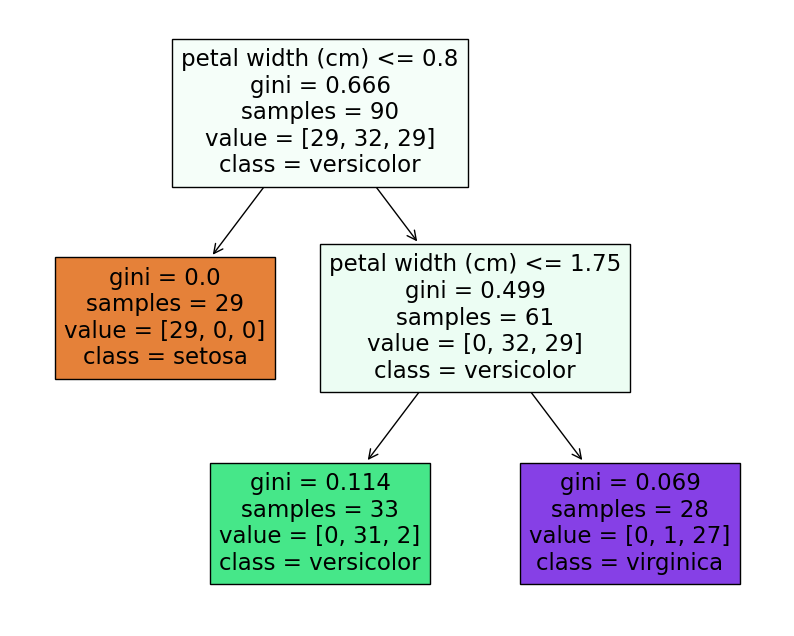

In [6]:
plt.figure(figsize = (10,8))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True);

**Nota:** La impureza o índice Gini de un nodo es su error de clasificación esperado de acuerdo con las probabilidades empíricas de las clases; esto es, la probabilidad de que una muestra aleatoria se clasifique mal si su clase se determina aleatoriamente según las probabilidades de las clases. Tomemos por ejemplo el nodo raíz. La probabilidad de observar una setosa es $29/90=0.3222$ y la probabilidad de que se clasifique mal es $(90-29)/90=0.6777$; así pues, la probabilidad de que se den ambas cosas es $p \times (1-p) = 0.3222\times 0.6777=0.2184$. Análogamente, las probabilidades de error con versicolor y virgínica son, respectivamente, $0.2291$ y $0.2184$. Sumando las tres tenemos la impureza Gini del nodo raíz, $0.666$. Si quieres comprueba que las impurezas Gini del resto de nodos son las que se indican en el árbol.

Usamos el test para predecir la precisión del árbol entrenado con el train:

In [7]:
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('La precisión de {0!s} es {1:.1%}'.format(dt, acc))

La precisión de DecisionTreeClassifier(max_depth=2, random_state=23) es 95.0%


En general, la precisión de un clasificador o, equivalentemente, su error de clasificación, es la medida de rendimiento que más nos interesa. Ahora bien, podría ocurrir que parte del error se deba a confusiones entre clases que a priori creemos que no deberían confundirse. Para comprobar si es así o no, podemos estudiar la matriz de confusiones (de las muestras de test):

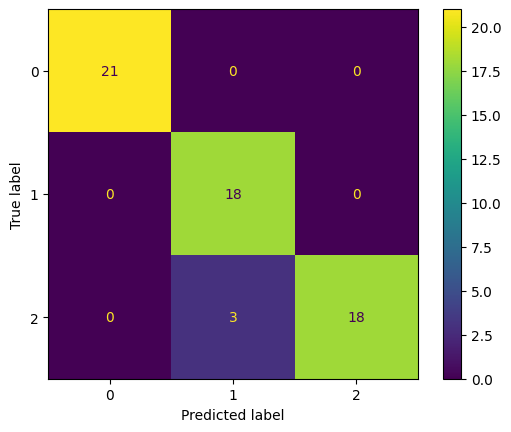

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Observa que los errores se hallan fuera de la diagonal; en particular, el árbol confunde $3$ virgínicas por versicolor, cosa que parece razonable por lo que sabemos del problema. No obstante, harían falta muchas más muestras de test para llegar a conclusiones bien respaldadas por la evidencia empírica.

**Ejercicio:** trata de mejorar la precisión con otros valores de max_depth

[Text(0.4444444444444444, 0.9166666666666666, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 90\nvalue = [29, 32, 29]\nclass = versicolor'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]\nclass = setosa'),
 Text(0.5555555555555556, 0.75, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 61\nvalue = [0, 32, 29]\nclass = versicolor'),
 Text(0.3333333333333333, 0.5833333333333334, 'petal length (cm) <= 5.45\ngini = 0.114\nsamples = 33\nvalue = [0, 31, 2]\nclass = versicolor'),
 Text(0.2222222222222222, 0.4166666666666667, 'petal length (cm) <= 4.95\ngini = 0.061\nsamples = 32\nvalue = [0, 31, 1]\nclass = versicolor'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = versicolor'),
 Text(0.3333333333333333, 0.25, 'sepal width (cm) <= 2.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]\nclass = versicolor'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),


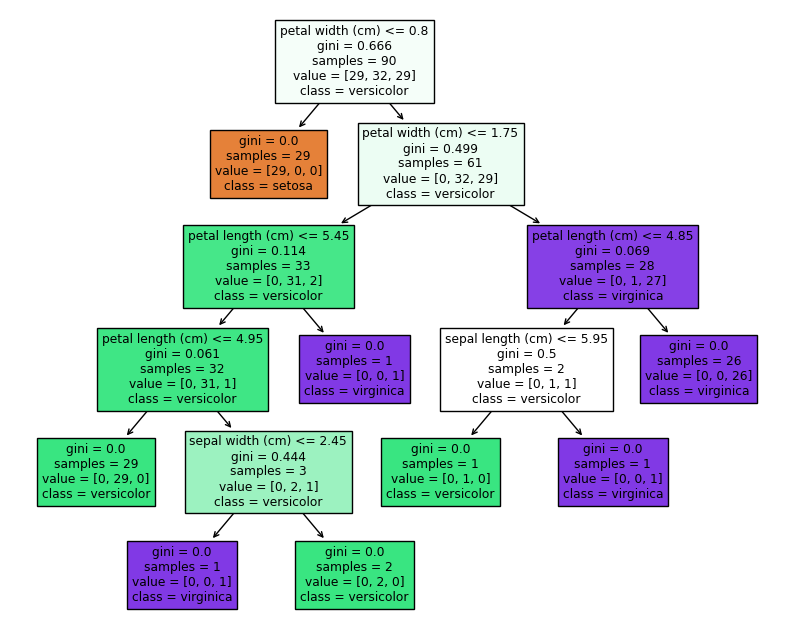

In [9]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    iris.data, iris.target, test_size=0.4, shuffle=True, random_state=23)


dt_2 = DecisionTreeClassifier(max_depth=5, random_state=23)
dt_2.fit(X_train_2, y_train_2)
plt.figure(figsize = (10,8))
plot_tree(dt_2, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

In [10]:
y_pred_2 = dt_2.predict(X_test_2)
acc_2 = accuracy_score(y_test_2, y_pred_2)
print('La precisión de {0!s} es {1:.1%}'.format(dt_2, acc_2))

La precisión de DecisionTreeClassifier(max_depth=5, random_state=23) es 96.7%


Los árboles de decisión son por lo general muy inestables; esto es, una pequeña variación en los datos de entrenamiento puede dar lugar a un árbol muy diferente del que se obtiene sin ella. El reducido tamaño de iris junto con dicha inestabilidad son fuente de gran variabilidad en las estimaciones de precisión de los experimentos con iris.

**Ejercicio:** prueba otras particiones aleatorias de los datos modificando la semilla random_state para generarlas y comprueba si la precisión varía significativamente o no

In [11]:
for i in range(1,10):
    seed=[20,21,22,23,24,25,26,27,28,29]
    X_train, X_test, y_train, y_test = train_test_split(
        iris.data, iris.target, test_size=i/10, shuffle=True, random_state=seed[i-1])

    dt = DecisionTreeClassifier(max_depth=2, random_state=seed[i-1])
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('La precisión de {0!s} con test_size={1:.1} es {1:.1%}'.format(dt,i/10,acc))

La precisión de DecisionTreeClassifier(max_depth=2, random_state=20) con test_size=0.1 es 10.0%
La precisión de DecisionTreeClassifier(max_depth=2, random_state=21) con test_size=0.2 es 20.0%
La precisión de DecisionTreeClassifier(max_depth=2, random_state=22) con test_size=0.3 es 30.0%
La precisión de DecisionTreeClassifier(max_depth=2, random_state=23) con test_size=0.4 es 40.0%
La precisión de DecisionTreeClassifier(max_depth=2, random_state=24) con test_size=0.5 es 50.0%
La precisión de DecisionTreeClassifier(max_depth=2, random_state=25) con test_size=0.6 es 60.0%
La precisión de DecisionTreeClassifier(max_depth=2, random_state=26) con test_size=0.7 es 70.0%
La precisión de DecisionTreeClassifier(max_depth=2, random_state=27) con test_size=0.8 es 80.0%
La precisión de DecisionTreeClassifier(max_depth=2, random_state=28) con test_size=0.9 es 90.0%


**Ejercicio:** Realizar una gráfica donde dependiendo del valor max_depth obtengamos una estimación del error de clasificación más suave. Para ello lanzaremos para cada valor de profundidad un aprendizaje con $N=10$ diferentes semillas y promediaremos el resultado. Todo este proceso debe estar automatizado.

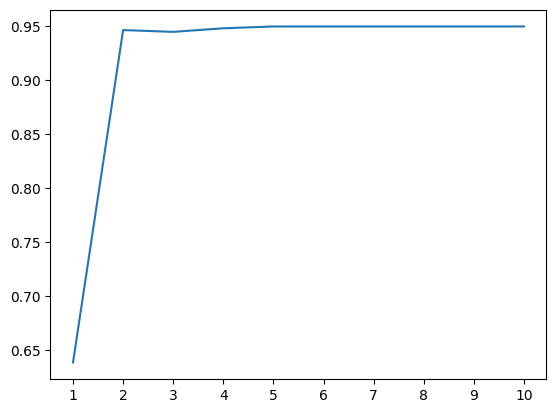

In [12]:
import numpy as np

N = 10
ini_seed = 30
seeds = [np.random.randint(200) for _ in range(N)]
depth = [d for d in range(1,11)]
result = []

for i in depth:
    acc=0
    for s in seeds:
        X_train, X_test, y_train, y_test = train_test_split(
        iris.data, iris.target, test_size=0.4, shuffle=True, random_state=s)

        dt = DecisionTreeClassifier(max_depth=i, random_state=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_test)
        acc += accuracy_score(y_test, y_pred)
    result.append(acc/N)

plt.xticks(ticks=depth)
plt.plot(depth,result)
